# Лабораторная работа №1

## Создание "истории о данных" (Data Storytelling)

##### Выполнил: Борисочкин М. И. ИУ5-21М

### Задание

- Выбрать набор данных (датасет). Для лабораторных работ не рекомендуется выбирать датасеты очень большого размера.

- Создать "историю о данных" в виде юпитер-ноутбука, с учетом следующих требований:
1. История должна содержать не менее 5 шагов (где 5 - рекомендуемое количество шагов). Каждый шаг содержит график и его текстовую интерпретацию.
2. На каждом шаге наряду с удачным итоговым графиком рекомендуется в юпитер-ноутбуке оставлять результаты предварительных "неудачных" графиков.
3. Не рекомендуется повторять виды графиков, желательно создать 5 графиков различных видов.
4. Выбор графиков должен быть обоснован использованием методологии data-to-viz. Рекомендуется учитывать типичные ошибки построения выбранного вида графика по методологии data-to-viz. Если методология Вами отвергается, то просьба обосновать Ваше решение по выбору графика.
5. История должна содержать итоговые выводы. В реальных "историях о данных" именно эти выводы представляют собой основную ценность для предприятия.
- Сформировать отчет и разместить его в своем репозитории на github.

### Импорт библиотек

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import squarify

%matplotlib inline
sns.set(style="whitegrid")

### Описание набора данных

В качестве набора данных, о котором будет писаться история, был выбран датасет [Coffee Distribution Across 94 Counties](https://www.kaggle.com/datasets/parasrupani/coffee-distribution-across-94-counties). В нём содержатся данные о производстве, поставке и распределении кофе в 94 странах мира в период с 1960 по 2023 год.

Исходный набор данных содержит следующие столбцы:
- Country. Страна
- Year. Год
- Arabica Production. Производство арабики
- Bean Exports. Экспорт зёрен
- Bean Imports. Импорт зёрен
- Beginning Stocks. Начальные акции на кофе
- Domestic Consumption. Потребление кофе в стране-производителе
- Ending Stocks. Финальные акции на кофе
- Exports. Экспорт кофе
- Imports. Импорт кофе
- Other Production. Другая продукция
- Production. Производство кофе
- Roast & Ground Exports. Экспорт обжаренных зёрен и молотого кофе
- Roast & Ground Imports. Импорт обжаренных зёрен и молотого кофе
- Robusta Production. Производство робусты
- Rst,Ground Dom. Consum. Потребление обжаренных зёрен и молотого кофе в стране-производителе
- Soluble Dom. Cons. Потребление растворимого кофе в стране-производителе
- Soluble Exports. Экспорт растворимого кофе
- Soluble Imports. Импорт растворимого кофе
- Total Distribution. Итоговое распределение кофе
- Total Supply. Итоговое количество поставок кофе

Примечание: все числовые характеристики, связанные с кофе, считаются в тысячах мешках, номиналом в 60 кг.

### Загрузка набора данных

In [3]:
data = pd.read_csv("./data/psd_coffee.csv")

data.sample(10, random_state=1)

,Country,Year,Arabica Production,Bean Exports,Bean Imports,Beginning Stocks,Domestic Consumption,Ending Stocks,Exports,Imports,...,Production,Roast & Ground Exports,Roast & Ground Imports,Robusta Production,"Rst,Ground Dom. Consum",Soluble Dom. Cons.,Soluble Exports,Soluble Imports,Total Distribution,Total Supply
5460,United Kingdom,1980,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4367,Rwanda,1975,434,436,0,47,2,43,436,0,...,434,0,0,0,2,0,0,0,481,481
1227,Costa Rica,1971,1551,1216,0,337,149,523,1216,0,...,1551,0,0,0,149,0,0,0,1888,1888
2253,Guyana,1973,0,0,0,0,10,0,0,0,...,10,0,0,3,10,0,0,0,10,10
79,Algeria,1975,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2394,Honduras,1986,1535,1398,0,91,140,88,1398,0,...,1535,0,0,0,140,0,0,0,1626,1626
605,Brazil,1989,22500,16330,0,19863,8000,19533,18330,0,...,26000,0,0,3500,7650,350,2000,0,45863,45863
4669,Sierra Leone,2021,0,30,0,0,10,0,30,0,...,40,0,0,40,10,0,0,0,40,40
3003,"Korea, South",2019,0,0,2660,0,2980,0,0,2980,...,0,0,320,0,2980,0,0,0,2980,2980
1504,Dominican Republic,1992,680,462,0,314,312,217,467,0,...,682,5,0,2,312,0,0,0,996,996


### 1. Экспорт зёрен в 2023 году


In [4]:
# Создание новой подвыборки для решения необходимой задачи
data_export_2023 = data[data["Year"] == 2023].copy()
data_export_2023 = data_export_2023[["Country", "Bean Exports"]]
data_export_2023.head()

,Country,Bean Exports
63,Albania,0
127,Algeria,0
191,Angola,15
255,Argentina,0
319,Armenia,0


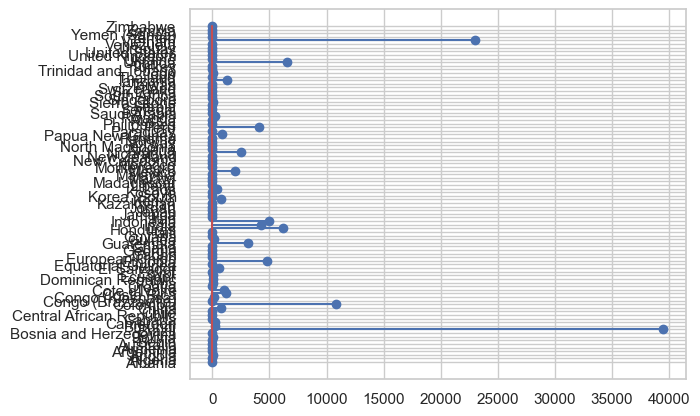

In [5]:
# Неудачный пример графика
_, ax = plt.subplots()
ax.stem(data_export_2023["Country"], data_export_2023["Bean Exports"], orientation = "horizontal")
plt.show()

График выше является неудачным примером визуализации: слишком много стран, среди которых много с нулевыми значениями. Попробуем вывести только те страны, у которых экспорт больше 0.

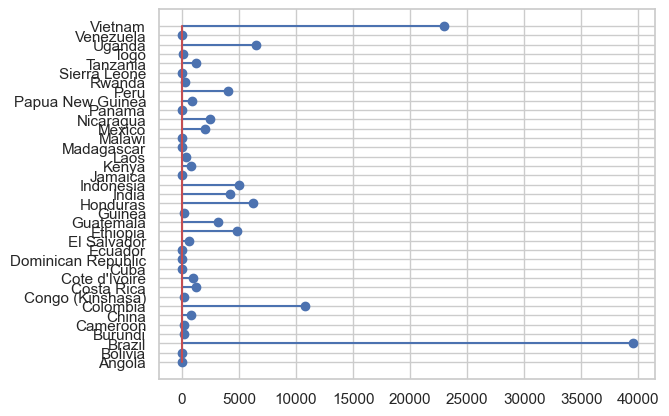

In [13]:
# Всё ещё неудачный пример графика
data_export_2023 = data_export_2023[data_export_2023["Bean Exports"] > 0]

_, ax = plt.subplots()
ax.stem(data_export_2023["Country"], data_export_2023["Bean Exports"], orientation = "horizontal")
plt.show()

Уже лучше, но стран всё равно много. Возьмём только топ 10. Также отсортируем их, уберём красную полосу, добавим назвнание графику и оси абсцисс.

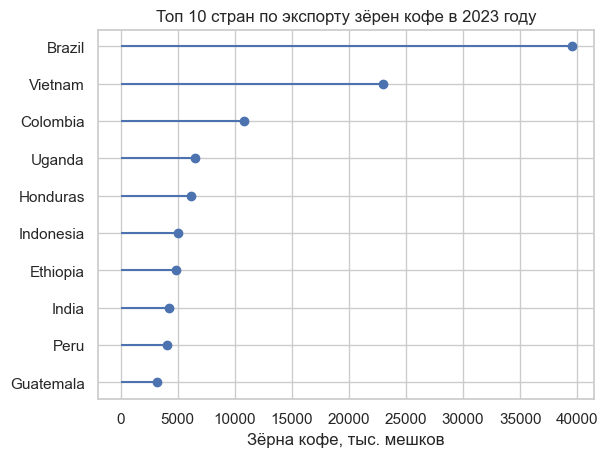

In [28]:
# Правильный график
data_export_2023_top10 = data_export_2023.sort_values(by="Bean Exports", ascending=False).head(10).reset_index(drop=True)
data_export_2023_top10 = data_export_2023_top10.sort_values(by="Bean Exports")

plt.hlines(y=data_export_2023_top10["Country"], xmax=data_export_2023_top10["Bean Exports"], xmin=0)
plt.plot(data_export_2023_top10["Bean Exports"], data_export_2023_top10["Country"], "o")
plt.title("Топ 10 стран по экспорту зёрен кофе в 2023 году")
plt.xlabel('Зёрна кофе, тыс. мешков')
plt.show()

**Итог**: В топ 10 вошли страны из южной/центральной америки, африки и юго-восточной азии. Лидером по экспорту оказалась Бразилия, на втором месте Вьетнам, на третьем — Колумбия

### Шаг 2. История экспорта зёрен стран из топ 3 экспорта в 2023 году

In [39]:
# Создание датасета для графика
data_export_history_top3 = data[(data["Country"] == "Brazil") 
                                |  (data["Country"] == "Vietnam") 
                                | (data["Country"] == "Colombia")][["Country", "Year", "Bean Exports"]]
data_export_history_top3.sample(12, random_state=1)

,Country,Year,Bean Exports
620,Brazil,2004,24505
1029,Colombia,1965,6199
5729,Vietnam,1993,2639
611,Brazil,1995,9650
5750,Vietnam,2014,19828
587,Brazil,1971,18567
1082,Colombia,2018,12400
1041,Colombia,1977,8274
1070,Colombia,2006,10460
5748,Vietnam,2012,23783


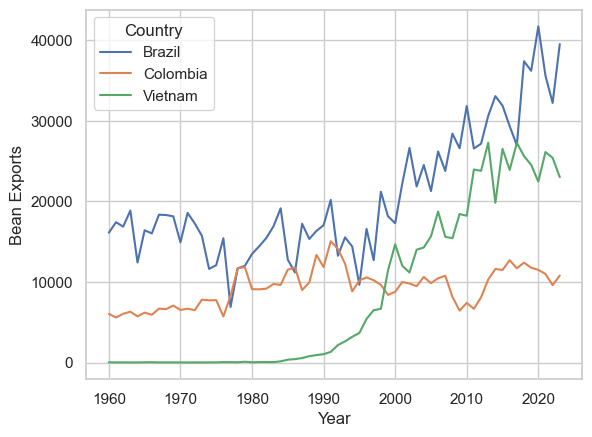

In [40]:
# Первоначальный вариант графика (неудачный)
sns.lineplot(data=data_export_history_top3, x="Year", y="Bean Exports", hue="Country")
plt.show()

В графикке выше все линии перемешались, как спагетти

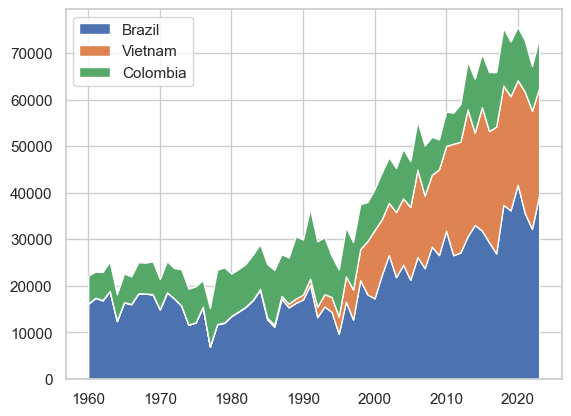

In [53]:
# Второй вариант графика (тоже неудачный)
plt.stackplot(data_export_history_top3["Year"].head(64), 
              data_export_history_top3[data_export_history_top3["Country"] == "Brazil"]["Bean Exports"],
              data_export_history_top3[data_export_history_top3["Country"] == "Vietnam"]["Bean Exports"],
              data_export_history_top3[data_export_history_top3["Country"] == "Colombia"]["Bean Exports"],
              labels=["Brazil", "Vietnam", "Colombia"])
plt.legend(loc="upper left")
plt.show()

Здесь полное искажение исходных данных. Создадим группу из трёх графиков

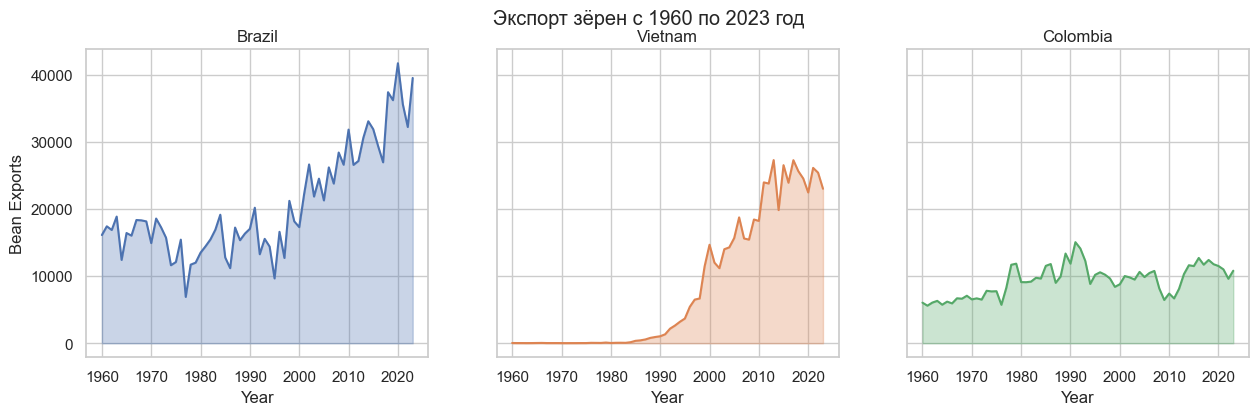

In [99]:
# Хороший график
years = data_export_history_top3["Year"].head(64)
colors = sns.color_palette("deep", 3)

fig, ax = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(15,4))

for i, country_name, color in zip(range(0,3), ["Brazil", "Vietnam", "Colombia"], colors):
    sns.lineplot(data=data_export_history_top3[data_export_history_top3["Country"] == country_name],
                 x="Year", y="Bean Exports", ax=ax[i], color=color)
    ax[i].fill_between(x=years, y1=0, y2=data_export_history_top3[data_export_history_top3["Country"] == country_name]["Bean Exports"] ,alpha=.3, color=color)
    ax[i].set_title(country_name)

fig.suptitle("Экспорт зёрен с 1960 по 2023 год")
plt.show()

**Итог**: Бразилия и Колумбия всегда экспортировали много зёрен. Вьетнам вступил в гонку только в 90х-00х.

### Шаг 3. Топ 10 потребителей кофе за 2023

In [107]:
# Создание подвыборки для данного случая
data_consumption_2023 = data[(data["Year"] == 2023) & (data["Domestic Consumption"] > 0)][["Country", "Domestic Consumption"]].copy()
data_consumption_2023.sample(10, random_state=1)

,Country,Domestic Consumption
1535,Dominican Republic,110
4479,Saudi Arabia,1000
767,Cameroon,80
5567,United States,25475
4351,Russia,4250
2175,Guatemala,625
3263,Madagascar,290
2751,Japan,7317
2815,Jordan,650
4799,South Africa,750


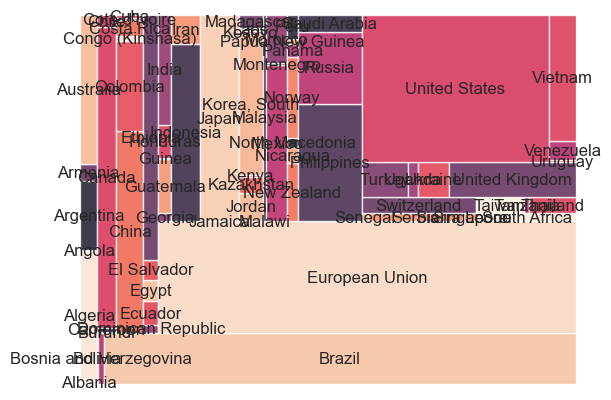

In [108]:
# Treemap с потреблением всех стран
squarify.plot(sizes=data_consumption_2023["Domestic Consumption"], 
              label=data_consumption_2023["Country"], alpha=.8)
plt.axis('off')
plt.show()

Все страны на treemap — это много. Как и на первом шаге выберем только ограниченное число стран: топ 5.

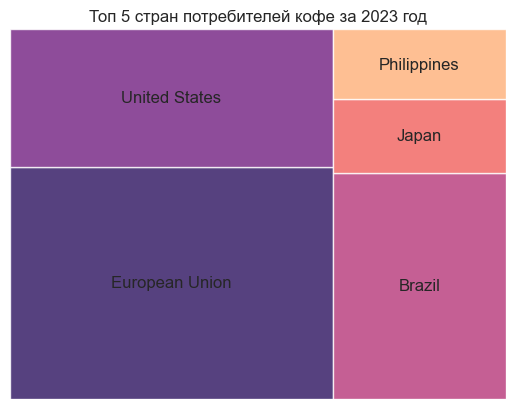

In [129]:
# Хороший график
data_consumption_2023_top5 = data_consumption_2023.sort_values(by="Domestic Consumption", ascending=False).head(5)

squarify.plot(sizes=data_consumption_2023_top5["Domestic Consumption"], 
              label=data_consumption_2023_top5["Country"], alpha=.8, color=sns.color_palette("magma", 5))
plt.axis('off')
plt.title("Топ 5 стран потребителей кофе за 2023 год")
plt.show()

**Итог**: Наибольшими потребителями кофе оказались США, ЕС и Бразилия.

### Шаг 4. Распределение между обжаренными зёрнами и растворимым кофе

Посмторим какой тип кофе больше пьют за 2023 год в топ 5 странах по потреблению

In [146]:
# Данные для графика
data_coffee_types_top5 = data[((data["Country"] == "European Union")
                             |  (data["Country"] == "United States")
                             | (data["Country"] == "Brazil")
                             |  (data["Country"] == "Japan") 
                             | (data["Country"] == "Philippines")) & (data["Year"] == 2023) ][["Country", "Rst,Ground Dom. Consum", "Soluble Dom. Cons."]].copy()

data_coffee_types_top5

,Country,"Rst,Ground Dom. Consum",Soluble Dom. Cons.
639,Brazil,21600,960
1919,European Union,41000,2125
2751,Japan,6817,500
4287,Philippines,600,6350
5567,United States,24675,800


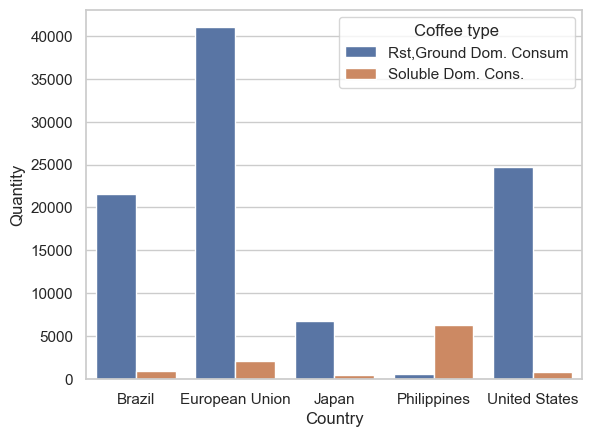

In [148]:
# Построение группового barplot-а (неудачного)
data_coffee_types_top5_melt = data_coffee_types_top5.melt(id_vars=["Country"], value_vars=["Rst,Ground Dom. Consum", "Soluble Dom. Cons."],
                                                          var_name="Coffee type", value_name="Quantity")

sns.barplot(data=data_coffee_types_top5_melt, x="Country", y="Quantity", hue="Coffee type")
plt.show()

Групповой barplot не очень хорошо себя показывает. Разделим его на два графика

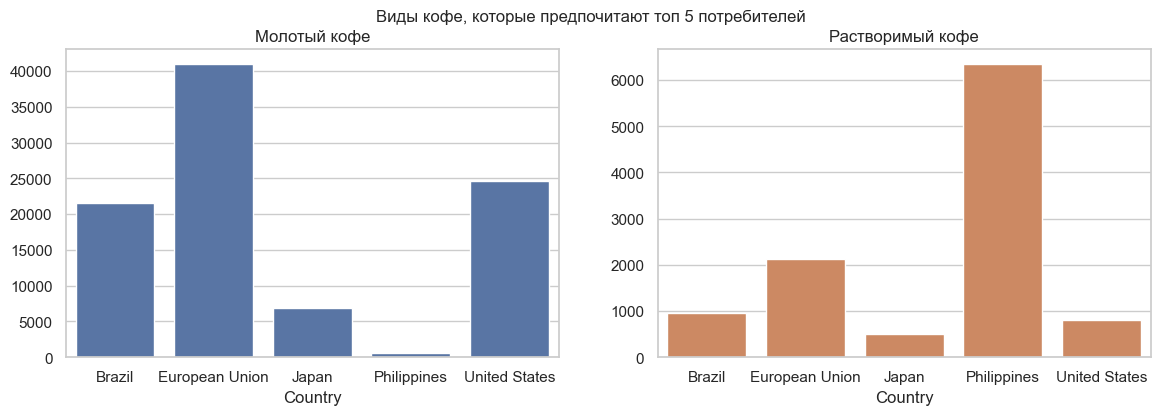

In [161]:
# Хороший график
colors = sns.color_palette("deep", 2)

fig, ax = plt.subplots(1, 2, sharex='col', figsize=(14,4))
sns.barplot(data=data_coffee_types_top5, x="Country", y="Rst,Ground Dom. Consum", ax=ax[0], color=colors[0])
sns.barplot(data=data_coffee_types_top5, x="Country", y="Soluble Dom. Cons.", ax=ax[1], color=colors[1])
ax[0].set_title("Молотый кофе")
ax[0].set_ylabel("")
ax[1].set_title("Растворимый кофе")
ax[1].set_ylabel("")
fig.suptitle("Виды кофе, которые предпочитают топ 5 потребителей", fontsize=12)
plt.show()

**Итог**: Страны, которые пьют больше всего кофе, в большинстве употребляют молотый кофе, кроме Филиппин: там предпочитают растворимый

### Шаг 5. Распредение потребляемых видов кофе за последнии пять лет в мире

In [272]:
# Создание нужного набора данных для построения графика
data_coffee_types_5years = data[(data["Year"] >= 2018)][["Year", "Rst,Ground Dom. Consum" , "Soluble Dom. Cons.", "Domestic Consumption"]].copy()

data_coffee_types_5years = data_coffee_types_5years.groupby(["Year"]).sum()

data_coffee_types_5years["% Rst"] = data_coffee_types_5years["Rst,Ground Dom. Consum"]/data_coffee_types_5years["Domestic Consumption"]*100
data_coffee_types_5years["% Soluble"] = data_coffee_types_5years["Soluble Dom. Cons."]/data_coffee_types_5years["Domestic Consumption"]*100

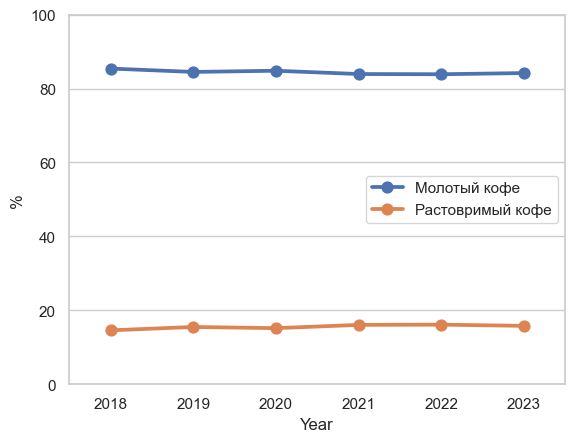

In [281]:
# График по видам потребляемого кофе с 2018 по 2023 год
sns.pointplot(data=data_coffee_types_5years,x="Year", y="% Rst", label="Молотый кофе")
sns.pointplot(data=data_coffee_types_5years, x="Year", y="% Soluble", label="Растовримый кофе")
plt.ylabel("%")
plt.ylim(0, 100)
plt.legend(loc="right")
plt.show()

**Итог**: За последние пять лет уровень потребления молотого и растворимого кофе стабилен и равен примерно 85 и 15 % соответственно.

### Итог

В результате нашего исследования выяснилось следующее:

1. Больше всего кофейные зёрна экспортируют Бразилия, Вьетнам и Колумбия;
2. Бразилия и Колумбия на всём временном диапазоне были крупными экспортёрами, а Вьетнам стал таковым только в 90х-00х;
3. Больше всего кофе потребляют США, ЕС, Бразилия, Япония и Филиппины; 
4. Среди топ 5 потребителей кофе все, кроме Филиппин, предпочитают молотый кофе.
5. За последние 5 лет уровень потребления молотого и растворимого кофе стабилен и равен примерно 85 и 15 % соответственно.